In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('nhanes_2015_2016.csv')

## Frequency tables

In [18]:
a = data.DMDEDUC2.value_counts()
print(a)


4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64


In [19]:
print(data.DMDEDUC2.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3)
print(data.shape)  # There are some missing variables

5474
5474
(5735, 28)


In [20]:
print(pd.isnull(data.DMDEDUC2).sum())

261


### Replacing integer codes with text labes

In [21]:
data['DMDEDUC2x'] = data.DMDEDUC2.replace({1: '<9',
                                           2: '9-11',
                                           3: 'HS/GED',
                                           4: 'Some college/AA',
                                           5: 'College',
                                           7: 'Refused',
                                           9: 'Don`t know'
                                           }
                                          )

print(data.DMDEDUC2x.value_counts())
print(data.DMDEDUC2.value_counts().sum())

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don`t know            3
Name: DMDEDUC2x, dtype: int64
5474


In [65]:
## Doing the same with gender:
data['RIAGENDRx'] = data.RIAGENDR.replace(
    {
        1: 'Male',
        2: 'Female'
    }
)
print(data.RIAGENDRx.value_counts())

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


#### Counting proportions

In [23]:
x = data.DMDEDUC2x.value_counts()
print(x / x.sum())

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don`t know         0.000548
Name: DMDEDUC2x, dtype: float64


#### Creating a variable for missing values

In [24]:
data['DMDEDUC2x'] = data.DMDEDUC2x.fillna('Missing')
x = data.DMDEDUC2x.value_counts()
print(x / x.sum())

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don`t know         0.000523
Name: DMDEDUC2x, dtype: float64


## Numerical summaries

In [27]:
print(data.BMXWT.dropna().describe(), end='\n\n')
# print(data.BMXWT.describe())

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64



In [33]:
## individual summary statistics using NumPy or Pandas
x = data.BMXWT.dropna()  # Extract all na into a variable 'x'
print(x.mean())  # Pandas
print(np.mean(x))  # NumPy

print(x.median())  # Pandas
print(np.percentile(x, 50))  # NumPy

print(np.percentile(x, 75))  # NumPy
print(x.quantile(0.75))  # Pandas

print(x.quantile(0.53))

81.34267560889516
81.34267560889516
78.2
78.2
92.7
92.7
79.6


A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139,
or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate
the proprotion of the NHANES sample who would be considered to have pre-hypertension

In [37]:
a = np.mean((data.BPXSY1 >= 120) & (data.BPXSY1 <= 139))
print(a)  # "&" means "and"

0.366870095902354


the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure:

In [38]:
b = np.mean((data.BPXDI1 >= 80) & (data.BPXDI1 <= 89))
print(b)

0.14699215344376634


the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure:

In [39]:
a = (data.BPXSY1 >= 120) & (data.BPXSY1 <= 139)
b = (data.BPXDI1 >= 80) & (data.BPXDI1 <= 89)
print(np.mean(a | b))

0.43173496076721884


exploring 'white coat anxiety' -> looking at mean difference (extent) between 2 measurements

In [40]:
print(np.mean(data.BPXSY1 - data.BPXSY2))
print(np.mean(data.BPXDI1 - data.BPXDI2))

0.6749860309182343
0.3490407897187558


## Graphical summaries

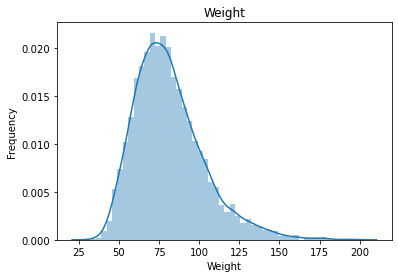

In [44]:
# Weight
sns.distplot(data.BMXWT.dropna()).set_title('Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.show()

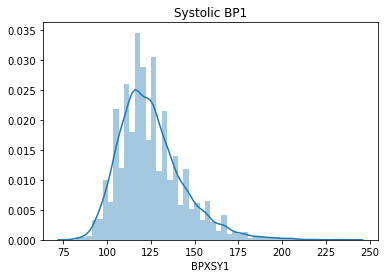

In [45]:
# Blood pressure:
sns.distplot(data.BPXSY1.dropna()).set_title('Systolic BP1')
plt.show()
# It`s divided into some clusters

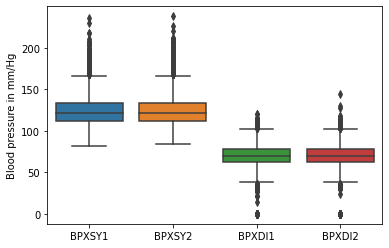

In [47]:
bp = sns.boxplot(data=data.loc[:, ['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']])
_ = bp.set_ylabel('Blood pressure in mm/Hg')

plt.show()

## Stratification

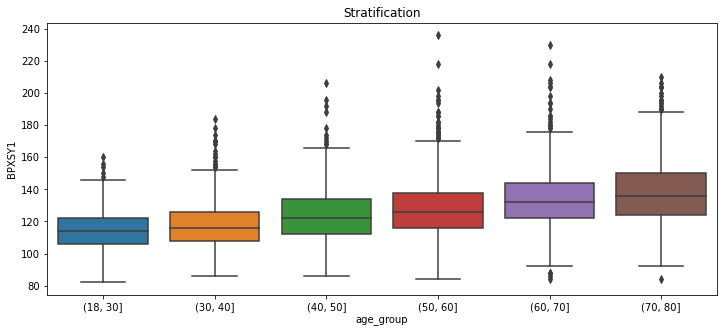

In [52]:
data['age_group'] = pd.cut(data.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])  # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x='age_group', y='BPXSY1', data=data).set_title('Stratification')
plt.show()

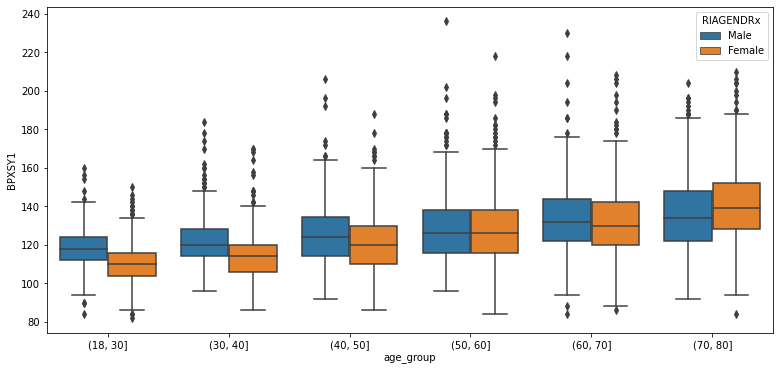

In [54]:
data['age_group'] = pd.cut(data.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(13,6))
sns.boxplot(x='age_group', y='BPXSY1', hue='RIAGENDRx', data=data)
plt.show()

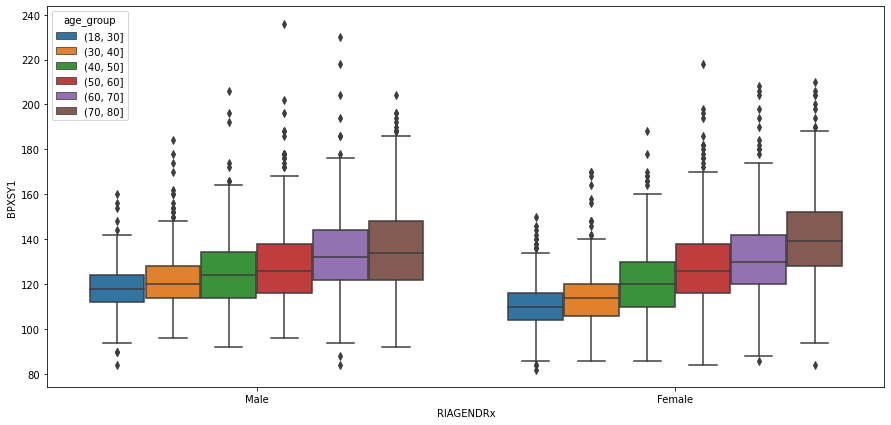

In [69]:
data['age_group'] = pd.cut(data.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(15, 7))
sns.boxplot(x='RIAGENDRx', y='BPXSY1', hue='age_group', data=data)
plt.show()

"Birth cohort effect". NHANES is a cross sectional survey (all data for one wave were collected at a single point in
time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people
who were in their 20's in 2015 were college-aged in around 2010 or later. Over the last few decades, it has become much
more common for people to at least begin a college degree than it was in the past. Therefore, younger people as a group
have higher educational attainment than older people as a group. As these young people grow older, the cross sectional
relationship between age and educational attainment will change.

In [66]:
groups = data.groupby('age_group')['DMDEDUC2x'].value_counts()
print(groups)

age_group  DMDEDUC2x      
(18, 30]   Some college/AA    364
           College            278
           HS/GED             237
           Missing            128
           9-11                99
           <9                  47
(30, 40]   Some college/AA    282
           College            264
           HS/GED             182
           9-11               111
           <9                  93
(40, 50]   Some college/AA    262
           College            260
           HS/GED             171
           9-11               112
           <9                  98
(50, 60]   Some college/AA    258
           College            220
           HS/GED             220
           9-11               122
           <9                 104
(60, 70]   Some college/AA    238
           HS/GED             192
           College            188
           <9                 149
           9-11               111
(70, 80]   Some college/AA    217
           HS/GED             184
           <9        

In [68]:
dx = data.loc[~data.DMDEDUC2x.isin(['Don`t know', 'Missing']), :]  # Eliminate rare/missing values
dx = dx.groupby(['age_group', 'RIAGENDRx'])['DMDEDUC2x']
dx = dx.value_counts()
print(dx)
dx = dx.unstack()
print(dx)# Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx)
print(dx.to_string(float_format='%.3f'))    # Limit display to 3 decimal places

age_group  RIAGENDRx  DMDEDUC2x      
(18, 30]   Female     Some college/AA    207
                      College            156
                      HS/GED             119
                      9-11                44
                      <9                  27
           Male       Some college/AA    157
                      College            122
                      HS/GED             118
                      9-11                55
                      <9                  20
(30, 40]   Female     Some college/AA    159
                      College            149
                      HS/GED              78
                      <9                  46
                      9-11                42
           Male       Some college/AA    123
                      College            115
                      HS/GED             104
                      9-11                69
                      <9                  47
(40, 50]   Female     Some college/AA    157
                 